In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
#customersdata = pd.read_csv("D:\My Course\Tutorial.point\MachineLearning\Mall_Customers.csv")
customersdata = pd.read_csv("D:\\My Course\\Tutorial.point\\MachineLearning\\Mall_Customers.csv")


In [3]:
customersdata.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
kmeans_model = KMeans(init='k-means++',  max_iter=400, random_state=42)

In [5]:
#kmeans_model.fit(customersdata[['Gender','Age','Annual Income(k$)','Spending Score(1-100)']])
kmeans_model.fit(customersdata[[ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']])


KMeans(max_iter=400, random_state=42)

In [6]:
print(customersdata.columns)


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [7]:
def try_different_clusters(K, data):

    cluster_values = list(range(1, K+1))
    inertias=[]

    for c in cluster_values:
        model = KMeans(n_clusters = c,init='k-means++',max_iter=400,random_state=42)
        model.fit(data)
        inertias.append(model.inertia_)

    return inertias

In [8]:
#outputs = try_different_clusters(12, customersdata[['products_purchased','complains','money_spent']])
#distances = pd.DataFrame({"clusters": list(range(1, 13)),"sum of squared distances": outputs})

In [9]:
outputs = try_different_clusters(12, customersdata[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
distances = pd.DataFrame({"clusters": list(range(1, 13)), "sum of squared distances": outputs})


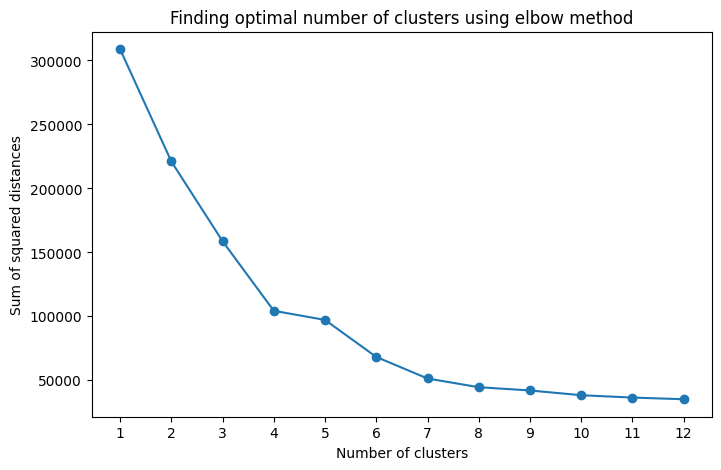

In [10]:

# Plotting the elbow graph to find the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(distances["clusters"], distances["sum of squared distances"], marker='o', linestyle='-')

# Setting labels and title
plt.xticks(range(1, 13))  # Set x-ticks from 1 to 12
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared distances")
plt.title("Finding optimal number of clusters using elbow method")

# Show the plot
plt.show()


In [11]:
kmeans_model_new = KMeans(n_clusters=5, init='k-means++', max_iter=400, random_state=42)

kmeans_model_new.fit_predict(customersdata[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])


array([2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 4, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [12]:
cluster_centers = kmeans_model_new.cluster_centers_
data = np.expm1(cluster_centers)
points = np.append(data, cluster_centers, axis=1)
points

array([[1.17560309e+20, 5.29837020e+20, 1.42080148e+18, 4.62134831e+01,
        4.77191011e+01, 4.17977528e+01],
       [1.24402757e+14, 9.61095798e+46, 8.47223607e+35, 3.24545455e+01,
        1.08181818e+02, 8.27272727e+01],
       [5.27935664e+10, 7.06523148e+12, 9.72825493e+31, 2.46896552e+01,
        2.95862069e+01, 7.36551724e+01],
       [3.49310233e+17, 6.07603023e+37, 1.23478664e+08, 4.03947368e+01,
        8.70000000e+01, 1.86315789e+01],
       [6.38705049e+13, 1.11137837e+33, 5.88418174e+33, 3.17878788e+01,
        7.60909091e+01, 7.77575758e+01]])

In [13]:
points = np.append(points, [[0], [1], [2], [3], [4]], axis=1)
customersdata["clusters"] = kmeans_model_new.labels_

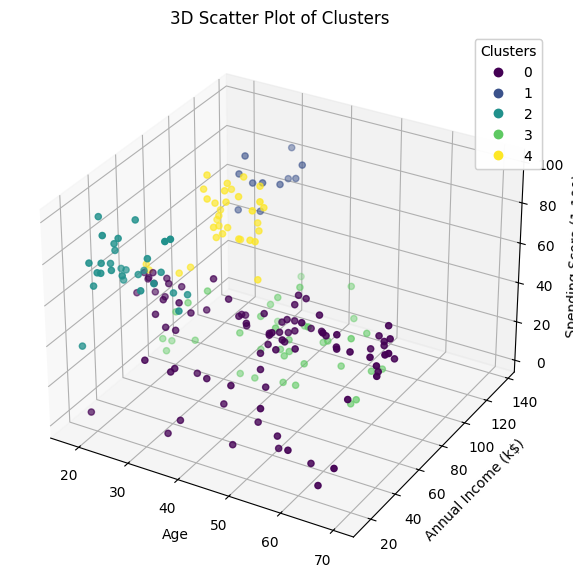

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming clusters have already been assigned to the `customersdata` DataFrame
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting each cluster with a different color
scatter = ax.scatter(
    customersdata['Age'], 
    customersdata['Annual Income (k$)'], 
    customersdata['Spending Score (1-100)'],
    c=customersdata['clusters'],  # Assumes clusters column exists in customersdata
    cmap='viridis',               # Change colormap if needed
    marker='o'
)

# Adding labels
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
ax.set_title("3D Scatter Plot of Clusters")

# Adding a legend based on unique cluster values
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()
